<a href="https://colab.research.google.com/github/swistak7171/175IC-machine-learning/blob/master/zad.9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

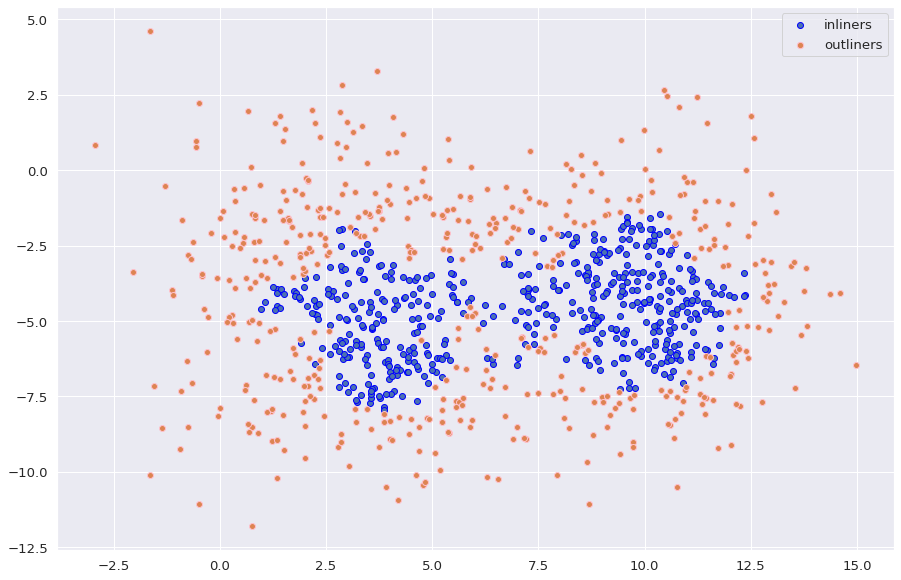

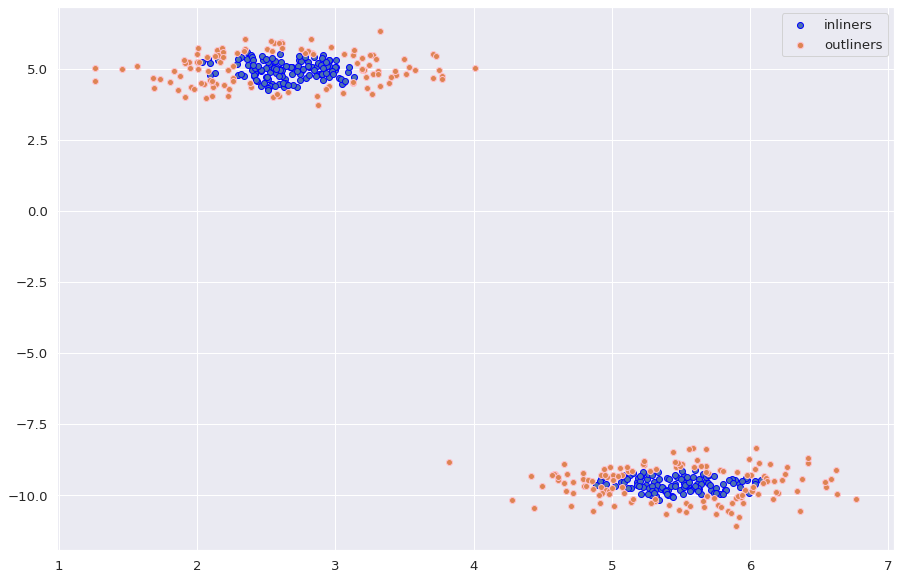

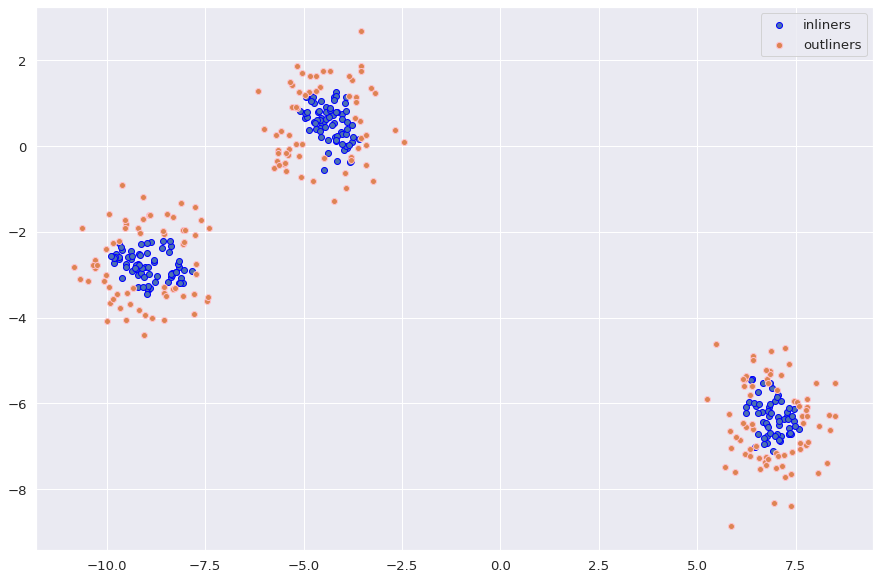

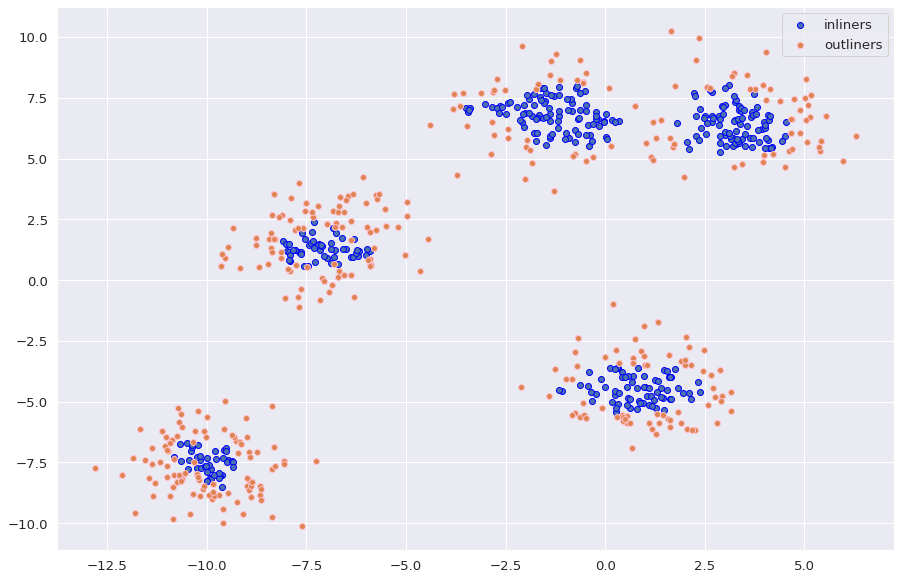

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.datasets import make_blobs
from sklearn.ensemble import IsolationForest

sns.set(font_scale=1.2)

def plot(data, n_estimators, contamination):
  forest = IsolationForest(n_estimators=n_estimators, contamination=contamination)
  predict = forest.fit_predict(data)
  all_data = pd.DataFrame(data, columns=['x', 'y'])
  all_data['outliner'] = predict
  
  plt.figure(figsize=(15, 10))
  inliners = all_data[all_data.outliner == 1].drop(columns='outliner')
  outliners = all_data[all_data.outliner == -1].drop(columns='outliner')
  
  plt.scatter(x=inliners.x, y=inliners.y, edgecolors='blue', label='inliners')
  plt.scatter(x=outliners.x, y=outliners.y, edgecolors='pink', label='outliners')
  legend = plt.legend()
  legend.legendHandles[1]._sizes = [40]
  plt.show()


parameters = [(1000, 4, 2, 30), (500, 2, 0.5, 10), (400, 3, 0.7, 15), (700, 5, 1.0, 100)]
for param in parameters:
  data = make_blobs(n_samples=param[0], centers=param[1], cluster_std=param[2], random_state=param[3])[0]
  plot(data, n_estimators=30, contamination=0.5)